In [85]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit


In [86]:
x, y, X = symbols("x y X") #  x >= 50
p = 1/5 * Pow((50/y), 11)

f = integrate(p, (y, 50, x))

equation = y - f

X = solve(equation, x)[1]
print(X)

50.0*(-1/(y - 1.0))**(1/10)


In [87]:
n = 160
arr = np.random.rand(n)
print(arr)

[0.41234347 0.33479553 0.72451899 0.23436234 0.65440464 0.47305706
 0.81078073 0.69812654 0.83430658 0.62101147 0.70615642 0.80800692
 0.4907007  0.97726659 0.22309585 0.01229986 0.29937215 0.48110902
 0.21093913 0.08017875 0.26673006 0.54006908 0.20946518 0.57163115
 0.41321967 0.74794558 0.86420603 0.77387995 0.73275152 0.85177221
 0.32882763 0.25808582 0.04329479 0.34710667 0.17006701 0.19459671
 0.62646049 0.6132239  0.13770923 0.466206   0.08564604 0.40042486
 0.20580516 0.91836696 0.77100633 0.04382692 0.57943483 0.87175775
 0.39600249 0.13452571 0.10421672 0.26309189 0.43754368 0.31316542
 0.10992812 0.87210136 0.29905868 0.02117312 0.42449165 0.8874614
 0.08639791 0.94825138 0.80973774 0.12247568 0.65398265 0.43450615
 0.84145458 0.83119702 0.75001355 0.40931956 0.45728672 0.64929707
 0.14698599 0.95337615 0.37690646 0.10924291 0.81390433 0.25419648
 0.45107635 0.01760029 0.99253521 0.73265588 0.5037624  0.19432068
 0.55558392 0.01515455 0.21320069 0.40331746 0.38613504 0.77328

In [88]:
f_arr = np.array([X.subs(y, i) for i in arr])
print(f_arr)

[52.7299850003492 52.0804212819318 56.8801636872489 51.3532194100121
 55.6049191846902 53.3081542105751 59.0572836231634 56.3621448100342
 59.8465993818105 55.0943923419122 56.5143040140527 58.9714010301731
 53.4900120877211 72.9967551419233 51.2782576239586 50.0619189569797
 51.8109153051815 53.3903037721898 51.1987023574792 50.4196307308458
 51.5755201121627 54.0381837751065 51.1891483235503 54.4237190524415
 52.7378534978147 57.3879317263122 61.0494780464992 58.0144389432734
 57.0529991379788 60.5169514684151 52.0339262481495 51.5151106576963
 50.2217903113111 52.1778020680495 50.9407930006354 51.0938542225359
 55.1742387897735 54.9824440903672 50.7463289669623 53.2393366696919
 50.4496978170793 52.6242164433406 51.1655088995517 64.2367272280304
 57.9412229311563 50.2245845597044 54.5238700025981 61.3997908479140
 52.5855583091288 50.7276316928760 50.5533230879524 51.5500001040092
 52.9616033083969 51.9140354198015 50.5856688170277 61.4162662857910
 51.8085977688150 50.1071170017047

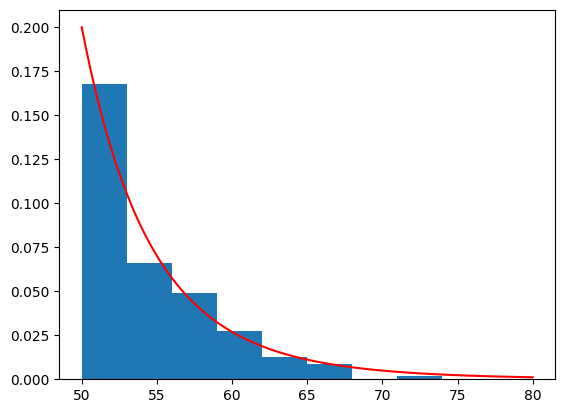

In [89]:
x_ = np.linspace(50, 80, 100)
y_ = [p.subs(y, i) for i in x_]
peaks, bars, _ = plt.hist(f_arr, density=True, range=(50, 80))
plt.plot(x_, y_, color="red")

In [90]:
mx = np.mean(f_arr)
mu2 = np.mean([x*x for x in f_arr])
s2 = mu2 - mx**2
Mx = integrate(y*p, (y, 50, np.inf))
Disp = integrate(y*y*p, (y, 50, np.inf)) - Mx**2
print(mx, Mx)
print(s2, Disp)

55.1572061843076 55.5555555555556
39.6464435605176 38.5802469135806


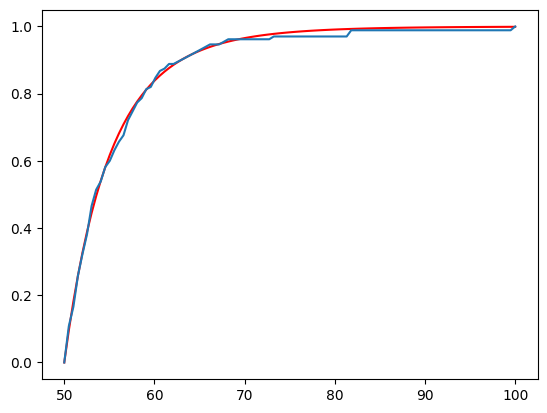

In [91]:
xmin = min(f_arr)
xmax = max(f_arr)
p_values = f_arr/sum(f_arr)

xx = np.linspace(int(xmin), int(xmax+1), 100)
Femp = np.empty(shape=100)
F = np.empty(shape=100)

j = 0
for i in xx:
    Femp[j] = np.sum(p_values[f_arr<i])
    j+=1

j = 0
for i in xx:
    if i >= 50:
        F[j] = f.subs(x, i)
    else:
        F[j] = 0
    j += 1

plt.plot(xx, F, color="red")
plt.plot(xx, Femp)

0.09675568900512374


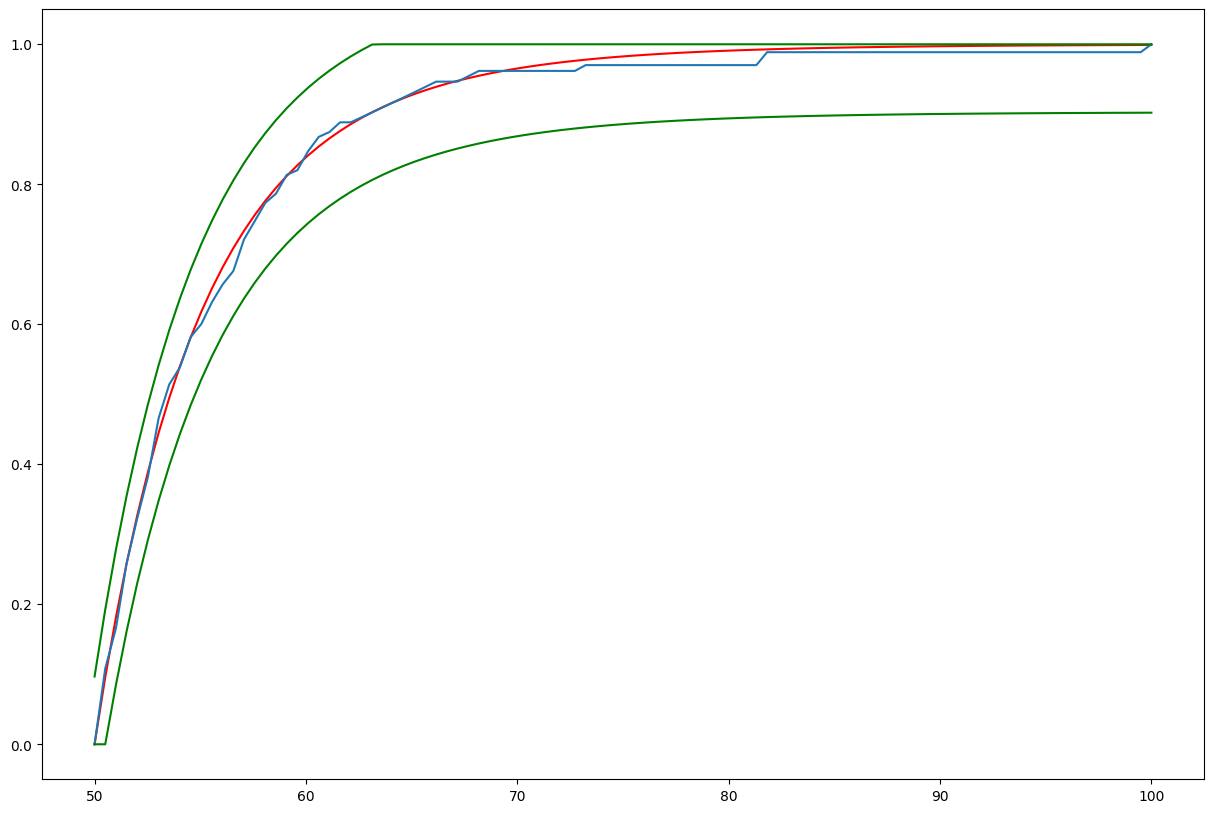

In [97]:
lmbd = 0.1
eps = (-1/(2*n)*math.log(lmbd/2))**0.5
print(eps)
Fsup = np.empty(shape=100)
Finf = np.empty(shape=100)
j = 0
for i in xx:
    if F[j] + eps < 1:
        Fsup[j] = F[j] + eps
    else:
        Fsup[j] = 1
    if F[j] - eps > 0:
        Finf[j] = F[j] - eps
    else:
        Finf[j] = 0
    j += 1
    
fig, ax = plt.figure(figsize=(15, 10)), plt.gca()
ax.plot(xx, F, color="red")
ax.plot(xx, Femp)
ax.plot(xx, Finf, color="green")
ax.plot(xx, Fsup, color="green")